In [ ]:
!pip install pandas scikit-learn torch
import pandas as pd
import numpy as np
!pip install torch torchvision


In [ ]:
# Load the data (update the path to your dataset)
data = pd.read_csv('/content/drive/MyDrive/deep learning fundementals /diabetes.csv')
# Display the first few rows of the dataset
print(data.head())

# Check the shape of the dataset
print("Dataset shape:", data.shape)

# Check for missing values
print(data.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Dataset shape: (768, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: in

In [ ]:
# Features (all columns except the first)
X = data.iloc[:, 1:].values  # Features

# Labels (the first column)
y = data.iloc[:, 0].values    # Class labels
# Convert labels from +1/-1 to 0/1 if needed
y = np.where(y == 1, 1, 0)  # Assuming 1 is positive and -1 is negative


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
import torch



In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape to match output
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  # Reshape to match output


In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import classification_report
# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


# Create the model
input_dim = X_train.shape[1]
model = Perceptron(input_dim)


In [ ]:
# Experiment 1

# Parameters
learning_rate = 0.01
n_epochs = 1000

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(n_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{n_epochs}], Loss: {loss.item():.4f}')

print('Training finished.')

Epoch [100/1000], Loss: 0.5725
Epoch [200/1000], Loss: 0.5324
Epoch [300/1000], Loss: 0.5068
Epoch [400/1000], Loss: 0.4899
Epoch [500/1000], Loss: 0.4781
Epoch [600/1000], Loss: 0.4697
Epoch [700/1000], Loss: 0.4636
Epoch [800/1000], Loss: 0.4590
Epoch [900/1000], Loss: 0.4555
Epoch [1000/1000], Loss: 0.4528
Training finished.


In [ ]:
# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_classes = (y_pred >= 0.5).float()

accuracy = (y_pred_classes.eq(y_test_tensor).sum().item()) / y_test_tensor.size(0)
print(f'Accuracy: {accuracy:.2f}')
y_test_classes = y_test_tensor.numpy()
print(classification_report(y_test_classes, y_pred_classes.numpy()))

Accuracy: 0.88
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       135
         1.0       0.00      0.00      0.00        19

    accuracy                           0.88       154
   macro avg       0.44      0.50      0.47       154
weighted avg       0.77      0.88      0.82       154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
## Experiment 2
# Parameters
learning_rate = 0.001
n_epochs = 1000

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(n_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{n_epochs}], Loss: {loss.item():.4f}')

print('Training finished.')

Epoch [100/1000], Loss: 0.4525
Epoch [200/1000], Loss: 0.4523
Epoch [300/1000], Loss: 0.4521
Epoch [400/1000], Loss: 0.4518
Epoch [500/1000], Loss: 0.4516
Epoch [600/1000], Loss: 0.4514
Epoch [700/1000], Loss: 0.4512
Epoch [800/1000], Loss: 0.4510
Epoch [900/1000], Loss: 0.4508
Epoch [1000/1000], Loss: 0.4506
Training finished.


In [ ]:
# grid search

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report

# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Training function
def train_model(model, criterion, optimizer, X_train, y_train, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

# Evaluation function
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = (outputs > 0.5).float()  # Binarize predictions
        return predictions

# Define hyperparameters for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 1.0],
    'num_epochs': [50, 100, 200],
    'optimizer': ['SGD', 'Adam', 'RMSprop']  # Add more optimizers as needed
}

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create a grid of parameters
grid = ParameterGrid(param_grid)

best_accuracy = 0
best_params = {}

for params in grid:
    # Initialize model, criterion
    model = Perceptron(input_dim=X_train_tensor.shape[1])
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss

    # Select optimizer based on parameters
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['learning_rate'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])
    elif params['optimizer'] == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=params['learning_rate'])
    else:
        raise ValueError(f"Unsupported optimizer: {params['optimizer']}")

    # Train the model
    train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, params['num_epochs'])

    # Evaluate the model
    predictions = evaluate_model(model, X_test_tensor, y_test_tensor)
    accuracy = (predictions.eq(y_test_tensor).sum() / y_test_tensor.size(0)).item()

    print(f"Params: {params}, Accuracy: {accuracy:.4f}")

    # Check for best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

# Final output
print(f"Best Params: {best_params}, Best Accuracy: {best_accuracy:.4f}")

# Detailed classification report for the best model
best_model = Perceptron(input_dim=X_train_tensor.shape[1])
criterion = nn.BCELoss()
if best_params['optimizer'] == 'SGD':
    optimizer = optim.SGD(best_model.parameters(), lr=best_params['learning_rate'])
elif best_params['optimizer'] == 'Adam':
    optimizer = optim.Adam(best_model.parameters(), lr=best_params['learning_rate'])
elif best_params['optimizer'] == 'RMSprop':
    optimizer = optim.RMSprop(best_model.parameters(), lr=best_params['learning_rate'])

train_model(best_model, criterion, optimizer, X_train_tensor, y_train_tensor, best_params['num_epochs'])
best_predictions = evaluate_model(best_model, X_test_tensor, y_test_tensor)

# Convert predictions and targets to numpy for classification report
best_predictions_np = best_predictions.numpy()
y_test_np = y_test_tensor.numpy()

print(classification_report(y_test_np, best_predictions_np))



Params: {'learning_rate': 0.01, 'num_epochs': 50, 'optimizer': 'SGD'}, Accuracy: 0.6364
Params: {'learning_rate': 0.01, 'num_epochs': 50, 'optimizer': 'Adam'}, Accuracy: 0.8766
Params: {'learning_rate': 0.01, 'num_epochs': 50, 'optimizer': 'RMSprop'}, Accuracy: 0.8766
Params: {'learning_rate': 0.01, 'num_epochs': 100, 'optimizer': 'SGD'}, Accuracy: 0.7857
Params: {'learning_rate': 0.01, 'num_epochs': 100, 'optimizer': 'Adam'}, Accuracy: 0.8701
Params: {'learning_rate': 0.01, 'num_epochs': 100, 'optimizer': 'RMSprop'}, Accuracy: 0.8766
Params: {'learning_rate': 0.01, 'num_epochs': 200, 'optimizer': 'SGD'}, Accuracy: 0.7532
Params: {'learning_rate': 0.01, 'num_epochs': 200, 'optimizer': 'Adam'}, Accuracy: 0.8766
Params: {'learning_rate': 0.01, 'num_epochs': 200, 'optimizer': 'RMSprop'}, Accuracy: 0.8766
Params: {'learning_rate': 0.1, 'num_epochs': 50, 'optimizer': 'SGD'}, Accuracy: 0.8701
Params: {'learning_rate': 0.1, 'num_epochs': 50, 'optimizer': 'Adam'}, Accuracy: 0.8766
Params: {'le

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


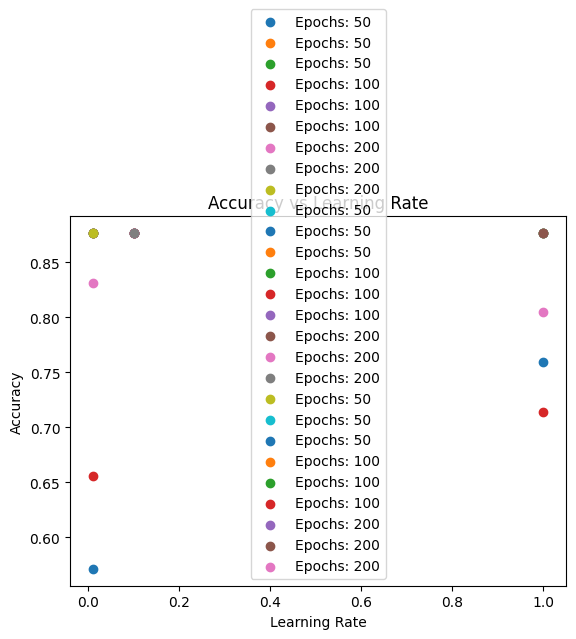

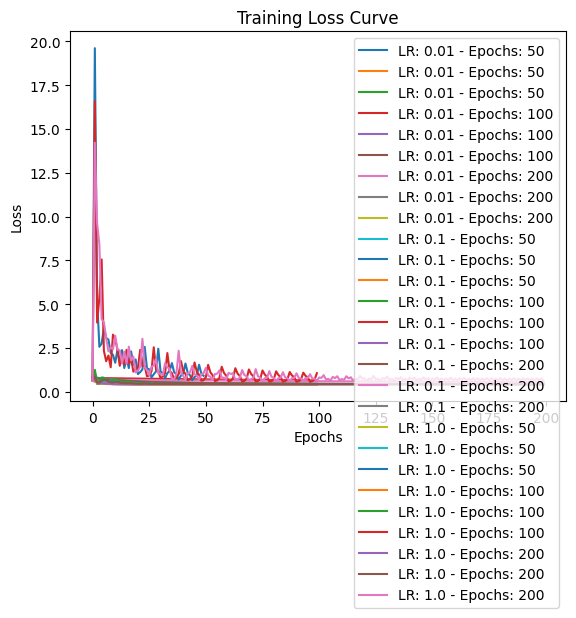

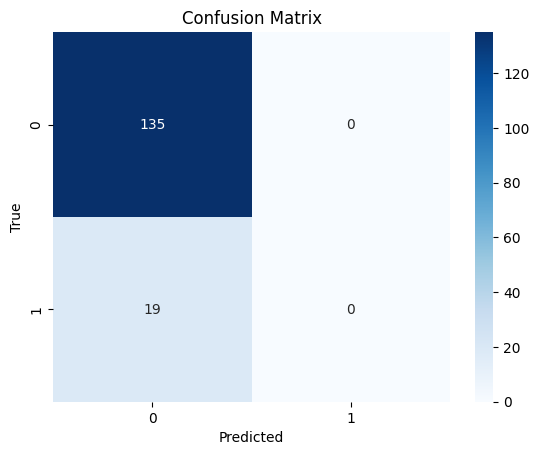

In [ ]:
# plots / visualisations

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Initialize lists to store results for plotting
results = []

# Create a grid of parameters
grid = ParameterGrid(param_grid)

for params in grid:
    # Initialize model, criterion
    model = Perceptron(input_dim=X_train_tensor.shape[1])
    criterion = nn.BCELoss()

    # Select optimizer based on parameters
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['learning_rate'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])
    elif params['optimizer'] == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=params['learning_rate'])

    # Train the model and record the accuracy
    train_losses = []
    for epoch in range(params['num_epochs']):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    # Evaluate the model
    predictions = evaluate_model(model, X_test_tensor, y_test_tensor)
    accuracy = (predictions.eq(y_test_tensor).sum() / y_test_tensor.size(0)).item()

    results.append({
        'params': params,
        'accuracy': accuracy,
        'train_losses': train_losses
    })

# Plotting Accuracy vs Hyperparameters
for param in results:
    learning_rate = param['params']['learning_rate']
    num_epochs = param['params']['num_epochs']
    plt.scatter(learning_rate, param['accuracy'], label=f'Epochs: {num_epochs}')

plt.title('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting Loss Curve
for param in results:
    plt.plot(param['train_losses'], label=f"LR: {param['params']['learning_rate']} - Epochs: {param['params']['num_epochs']}")

plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
best_model = Perceptron(input_dim=X_train_tensor.shape[1])
criterion = nn.BCELoss()
if best_params['optimizer'] == 'SGD':
    optimizer = optim.SGD(best_model.parameters(), lr=best_params['learning_rate'])
elif best_params['optimizer'] == 'Adam':
    optimizer = optim.Adam(best_model.parameters(), lr=best_params['learning_rate'])
elif best_params['optimizer'] == 'RMSprop':
    optimizer = optim.RMSprop(best_model.parameters(), lr=best_params['learning_rate'])

train_model(best_model, criterion, optimizer, X_train_tensor, y_train_tensor, best_params['num_epochs'])
best_predictions = evaluate_model(best_model, X_test_tensor, y_test_tensor)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_np, best_predictions_np)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


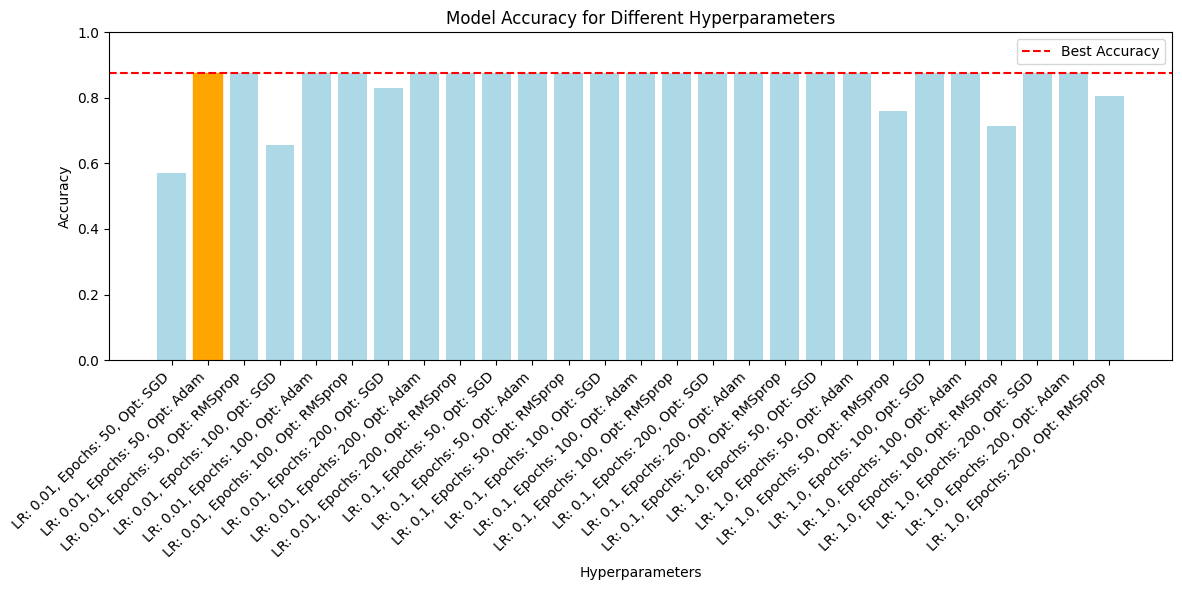

Best Params: {'learning_rate': 0.01, 'num_epochs': 50, 'optimizer': 'Adam'}, Best Accuracy: 0.8766


In [ ]:
#  comparisons of the best based on accuracy
# Find the best model
best_result = max(results, key=lambda x: x['accuracy'])

# Prepare data for the bar chart
param_labels = [f"LR: {res['params']['learning_rate']}, Epochs: {res['params']['num_epochs']}, Opt: {res['params']['optimizer']}" for res in results]
accuracies = [res['accuracy'] for res in results]

# Bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(param_labels, accuracies, color='lightblue')

# Highlight the best result
best_index = results.index(best_result)
bars[best_index].set_color('orange')  # Highlight the best bar

# Adding labels and title
plt.xticks(rotation=45, ha='right')
plt.title('Model Accuracy for Different Hyperparameters')
plt.xlabel('Hyperparameters')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 1 for better visibility
plt.axhline(y=best_result['accuracy'], color='red', linestyle='--', label='Best Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the best parameters and accuracy
print(f"Best Params: {best_result['params']}, Best Accuracy: {best_result['accuracy']:.4f}")

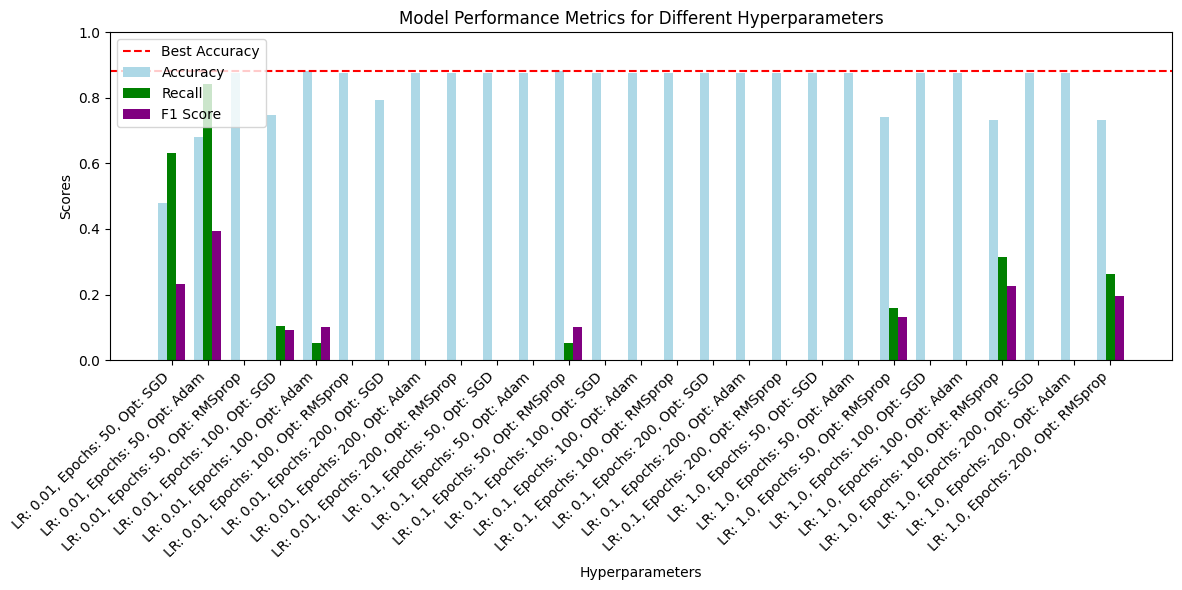

Best Params: {'learning_rate': 0.01, 'num_epochs': 100, 'optimizer': 'Adam'}, Best Accuracy: 0.8831, Recall: 0.0526, F1 Score: 0.1000


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, recall_score, f1_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store results for plotting
results = []

# Create a grid of parameters
grid = ParameterGrid(param_grid)

for params in grid:
    # Initialize model, criterion
    model = Perceptron(input_dim=X_train_tensor.shape[1])
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss

    # Select optimizer based on parameters
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['learning_rate'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])
    elif params['optimizer'] == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=params['learning_rate'])

    # Train the model
    for epoch in range(params['num_epochs']):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    predictions = evaluate_model(model, X_test_tensor, y_test_tensor)
    predictions_np = predictions.numpy().flatten()  # Flatten for metrics calculation

    # Calculate metrics
    accuracy = (predictions.eq(y_test_tensor).sum() / y_test_tensor.size(0)).item()
    recall = recall_score(y_test_np, predictions_np)
    f1 = f1_score(y_test_np, predictions_np)

    results.append({
        'params': params,
        'accuracy': accuracy,
        'recall': recall,
        'f1': f1
    })

# Prepare data for the bar chart
param_labels = [f"LR: {res['params']['learning_rate']}, Epochs: {res['params']['num_epochs']}, Opt: {res['params']['optimizer']}" for res in results]

# Prepare metrics for plotting
accuracies = [res['accuracy'] for res in results]
recalls = [res['recall'] for res in results]
f1_scores = [res['f1'] for res in results]

# Set bar width and positions
bar_width = 0.25
x = np.arange(len(param_labels))

# Create grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, accuracies, width=bar_width, label='Accuracy', color='lightblue')
plt.bar(x, recalls, width=bar_width, label='Recall', color='green')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score', color='purple')

# Adding labels and title
plt.xticks(x, param_labels, rotation=45, ha='right')
plt.title('Model Performance Metrics for Different Hyperparameters')
plt.xlabel('Hyperparameters')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Set the y-axis limit to 1 for better visibility
plt.axhline(y=max(accuracies), color='red', linestyle='--', label='Best Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the best parameters and scores
best_result = max(results, key=lambda x: x['accuracy'])
print(f"Best Params: {best_result['params']}, Best Accuracy: {best_result['accuracy']:.4f}, Recall: {best_result['recall']:.4f}, F1 Score: {best_result['f1']:.4f}")



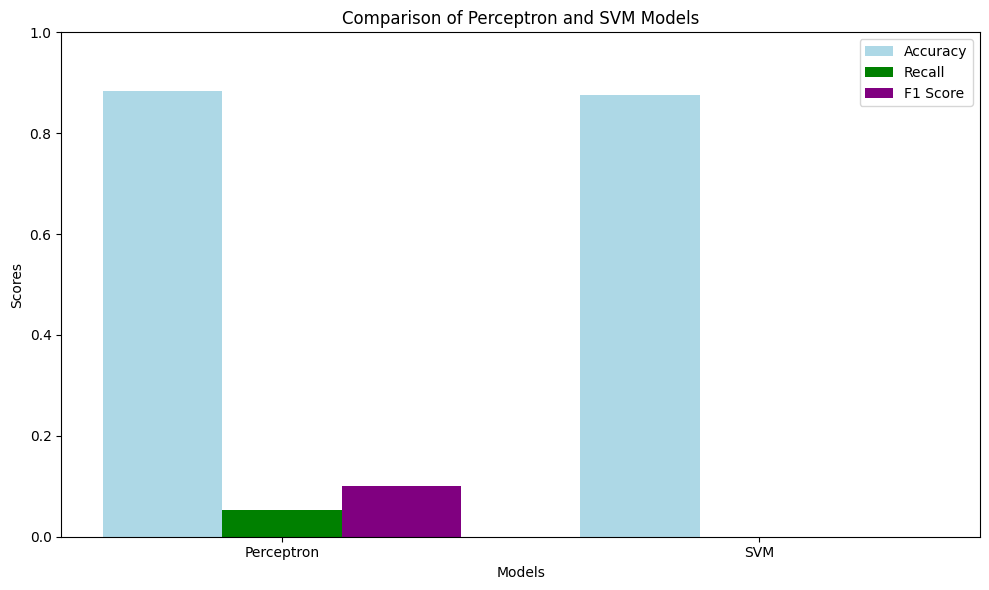

Perceptron - Accuracy: 0.8831, Recall: 0.0526, F1 Score: 0.1000
SVM - Accuracy: 0.8766, Recall: 0.0000, F1 Score: 0.0000


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Assuming you have already defined your Perceptron model and trained it as `best_model`

# Convert training and test data to NumPy arrays for SVM
X_train_np = X_train_tensor.numpy()
y_train_np = y_train_tensor.numpy().flatten()  # Flatten to 1D array
X_test_np = X_test_tensor.numpy()
y_test_np = y_test_tensor.numpy().flatten()

# Train the SVM model
svm_model = svm.SVC(kernel='linear')  # You can choose other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train_np, y_train_np)

# Predict with the SVM model
svm_predictions = svm_model.predict(X_test_np)

# Calculate metrics for the SVM model
svm_accuracy = accuracy_score(y_test_np, svm_predictions)
svm_recall = recall_score(y_test_np, svm_predictions)
svm_f1 = f1_score(y_test_np, svm_predictions)

# Store the results
results_comparison = {
    'Model': ['Perceptron', 'SVM'],
    'Accuracy': [best_result['accuracy'], svm_accuracy],
    'Recall': [best_result['recall'], svm_recall],
    'F1 Score': [best_result['f1'], svm_f1]
}

# Prepare data for the bar chart
labels = results_comparison['Model']
accuracies = results_comparison['Accuracy']
recalls = results_comparison['Recall']
f1_scores = results_comparison['F1 Score']

# Set bar width and positions
bar_width = 0.25
x = np.arange(len(labels))

# Create grouped bar chart for comparison
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, accuracies, width=bar_width, label='Accuracy', color='lightblue')
plt.bar(x, recalls, width=bar_width, label='Recall', color='green')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score', color='purple')

# Adding labels and title
plt.xticks(x, labels)
plt.title('Comparison of Perceptron and SVM Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Set the y-axis limit to 1 for better visibility
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print results
print(f"Perceptron - Accuracy: {best_result['accuracy']:.4f}, Recall: {best_result['recall']:.4f}, F1 Score: {best_result['f1']:.4f}")
print(f"SVM - Accuracy: {svm_accuracy:.4f}, Recall: {svm_recall:.4f}, F1 Score: {svm_f1:.4f}")


If the F1 score and recall are 0 for your SVM model, it typically indicates that the model is not making any positive predictions. This can occur for several reasons:

Class Imbalance: If one class significantly outnumbers the other in your dataset, the SVM may predict only the majority class. This can lead to a situation where it fails to predict any instances of the minority class, resulting in recall and F1 score of 0.

Data Separation: The data may not be separable with the chosen kernel. If the data points of different classes overlap significantly, the SVM may struggle to find a boundary that correctly classifies the points.

Thresholding Issue: For binary classification, the SVM typically outputs class labels directly. If the predicted probabilities are not handled correctly, you might be evaluating based on an inappropriate threshold.

Insufficient Training Data: If your training dataset is too small or not representative of the problem space, the model may not learn effectively.

Feature Scaling: SVMs are sensitive to feature scaling. If your features are not scaled (e.g., normalized or standardized), it could affect the performance of the SVM.

In [ ]:
# # how to fix this? step by step

#  check class distribution
from collections import Counter
print(Counter(y_train_np))
print(Counter(y_test_np))
# Inspect Predictions: Print the unique predictions from the SVM model:
print("Unique predictions from SVM:", np.unique(svm_predictions))

# Try a Different Kernel: Experiment with different SVM kernels (e.g., 'rbf', 'poly') to see if it improves classification.
svm_model = svm.SVC(kernel='rbf')  # or other kernels

# Feature Scaling: Normalize or standardize your features before training:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)

svm_model.fit(X_train_scaled, y_train_np)
svm_predictions = svm_model.predict(X_test_scaled)

# Adjust the Class Weight: If you're dealing with class imbalance, you can adjust the class weights in the SVM model:
svm_model = svm.SVC(kernel='linear', class_weight='balanced')




Counter({0.0: 498, 1.0: 116})
Counter({0.0: 135, 1.0: 19})
Unique predictions from SVM: [0.]


In [ ]:
# incoporate scaling and weights into svm

from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)

# Train the SVM model with class weights
svm_model = svm.SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train_scaled, y_train_np)

# Predict with the SVM model
svm_predictions = svm_model.predict(X_test_scaled)

# Calculate metrics for the SVM model
svm_accuracy = accuracy_score(y_test_np, svm_predictions)
svm_recall = recall_score(y_test_np, svm_predictions)
svm_f1 = f1_score(y_test_np, svm_predictions)

print(f"SVM - Accuracy: {svm_accuracy:.4f}, Recall: {svm_recall:.4f}, F1 Score: {svm_f1:.4f}")




SVM - Accuracy: 0.5909, Recall: 0.8947, F1 Score: 0.3505


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Convert training and test data to NumPy arrays if you haven't already
X_train_np = X_train_tensor.numpy()
y_train_np = y_train_tensor.numpy().flatten()  # Flatten to 1D array
X_test_np = X_test_tensor.numpy()
y_test_np = y_test_tensor.numpy().flatten()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Different kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

# Initialize SVM model
svm_model = svm.SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_np, y_train_np)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated F1 Score: {best_score:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
svm_predictions = best_model.predict(X_test_np)

# Calculate metrics for the best SVM model
svm_accuracy = accuracy_score(y_test_np, svm_predictions)
svm_recall = recall_score(y_test_np, svm_predictions)
svm_f1 = f1_score(y_test_np, svm_predictions)

print(f"SVM Test Accuracy: {svm_accuracy:.4f}")
print(f"SVM Test Recall: {svm_recall:.4f}")
print(f"SVM Test F1 Score: {svm_f1:.4f}")

# Optional: Print a classification report
print(classification_report(y_test_np, svm_predictions))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validated F1 Score: 0.2518
SVM Test Accuracy: 0.8247
SVM Test Recall: 0.3158
SVM Test F1 Score: 0.3077
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       135
         1.0       0.30      0.32      0.31        19

    accuracy                           0.82       154
   macro avg       0.60      0.61      0.60       154
weighted avg       0.83      0.82      0.83       154



In [ ]:
# # try bigger param grid :
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1]
# }

# #  Additional Scoring Metrics: Since you're already calculating several metrics, you could include them in the GridSearchCV scoring by using a dictionary of scores.

# scoring = {'accuracy': 'accuracy', 'f1': 'f1', 'recall': 'recall'}
# grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring=scoring, refit='f1', verbose=1, n_jobs=-1)


In [ ]:
#  comaprisons of both models and visualisations
import pandas as pd

# Best results from Perceptron model
perceptron_best_params = best_result['params']
perceptron_best_accuracy = best_result['accuracy']
perceptron_best_recall = best_result['recall']
perceptron_best_f1 = best_result['f1']

# Best results from SVM model (from grid search)
svm_best_accuracy = svm_accuracy
svm_best_recall = svm_recall
svm_best_f1 = svm_f1

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': ['SVM', 'Perceptron'],
    'Best Accuracy': [svm_best_accuracy, perceptron_best_accuracy],
    'Best Recall': [svm_best_recall, perceptron_best_recall],
    'Best F1 Score': [svm_best_f1, perceptron_best_f1],
    'Best Parameters': [best_params, perceptron_best_params]
})

# Display the comparison table
print(comparison_df)


        Model  Best Accuracy  Best Recall  Best F1 Score  \
0         SVM       0.824675     0.315789       0.307692   
1  Perceptron       0.883117     0.052632       0.100000   

                                     Best Parameters  
0       {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}  
1  {'learning_rate': 0.01, 'num_epochs': 100, 'op...  


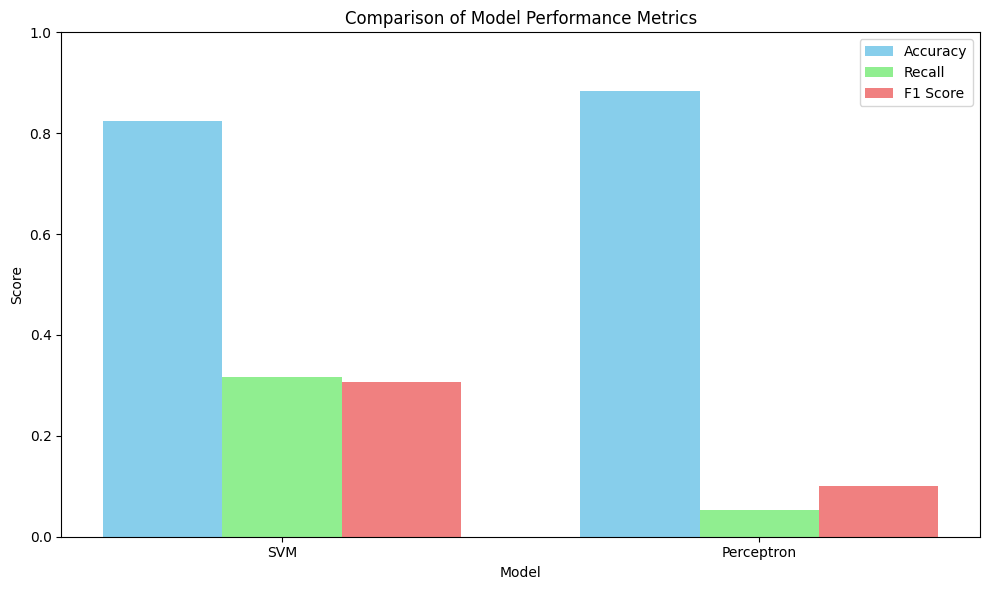

In [ ]:
#  visulaise
import matplotlib.pyplot as plt
import numpy as np

# Metrics for both models
models = ['SVM', 'Perceptron']
accuracies = [svm_best_accuracy, perceptron_best_accuracy]
recalls = [svm_best_recall, perceptron_best_recall]
f1_scores = [svm_best_f1, perceptron_best_f1]

# Bar width and positions
bar_width = 0.25
x = np.arange(len(models))

# Plotting grouped bars
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, accuracies, width=bar_width, label='Accuracy', color='skyblue')
plt.bar(x, recalls, width=bar_width, label='Recall', color='lightgreen')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score', color='lightcoral')

# Adding labels and title
plt.xticks(x, models)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Performance Metrics')
plt.ylim(0, 1)  # Set y-axis limit to 1 for clarity
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


Why Recall is Critical
In the context of diabetes, the goal is often to identify as many people with the condition as possible to ensure they receive proper treatment and monitoring. Missing a diagnosis (false negatives) could mean a person with diabetes goes untreated, leading to severe health complications. By maximizing recall, you reduce the chances of false negatives, ensuring that most or all cases of diabetes are identified.

Role of Precision and F1 Score
Precision: While less critical than recall in this context, precision still matters. A lower precision would mean some non-diabetic individuals may be incorrectly classified as diabetic (false positives). This can cause inconvenience or stress for those misclassified, but it’s often less harmful than a false negative.
F1 Score: F1 can still be useful here as it balances precision and recall, but if there’s a need to prioritize, recall would take precedence.
In sum, prioritizing high recall for diabetes-related data helps capture all true cases, ensuring those with the condition receive the necessary care.

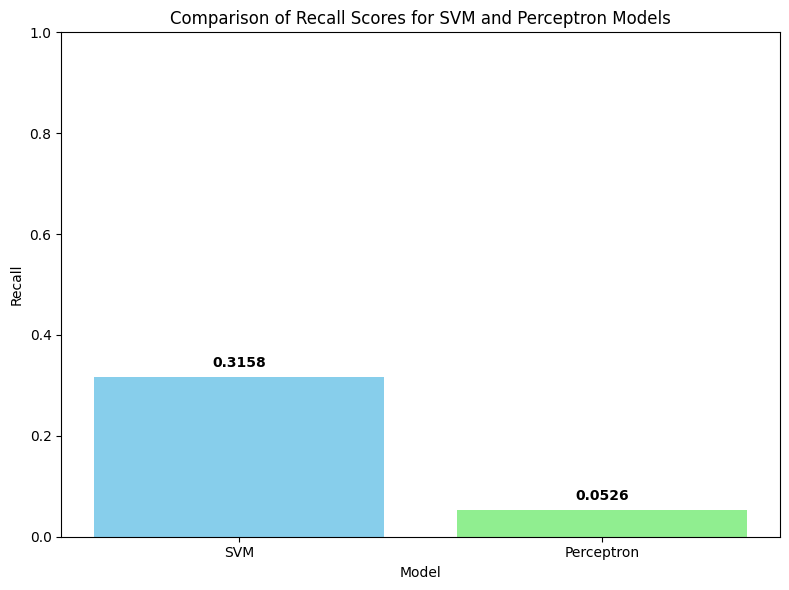

In [ ]:
#  comparisons of recall
import matplotlib.pyplot as plt
import numpy as np

# Recall scores for both models
models = ['SVM', 'Perceptron']
recalls = [svm_best_recall, perceptron_best_recall]

# Plotting the bar chart for recall comparison
plt.figure(figsize=(8, 6))
plt.bar(models, recalls, color=['skyblue', 'lightgreen'])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Comparison of Recall Scores for SVM and Perceptron Models')
plt.ylim(0, 1)  # Setting y-axis to range from 0 to 1 for better comparison

# Display the recall values on top of each bar
for i, v in enumerate(recalls):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()
